# In this notebook, we look into a sample of telematics data for one ESN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [2]:
telematics_sample_df = pq.read_table('../data_folder/TELEMATICS_MASTER_FILTERED.parquet').to_pandas()

In [9]:
incidents_tracker_df_filtered = pd.read_csv('../data_folder/incidents_tracker_cleaned_Jan09th.csv')

In [13]:
incidents_tracker_df_filtered = incidents_tracker_df_filtered.query('ESN == "79763462"')

In [19]:
incidents_tracker_df_filtered['Incident_Date'] = \
    incidents_tracker_df_filtered['Earliest Indication Date'].\
    apply(lambda x: x[:10])

In [21]:
telematics_sample_df['OCCURRENCE_DATE'] = telematics_sample_df['OCCURRENCE_DATE_TIME'].\
    apply(lambda x: str(x)[:10])

In [27]:
incident_record_tmp = incidents_tracker_df_filtered.loc[:, ['Incident_Date', 'Issue Number']]

In [31]:
telematics_sample_df = telematics_sample_df.\
    merge(incident_record_tmp, left_on = 'OCCURRENCE_DATE', 
          right_on = 'Incident_Date', how = 'left')

In [51]:
telematics_sample_df['Issue Number'].fillna('no_records', inplace = True)

In [52]:
telematics_sample_df.CUSTOMER_CITY.value_counts()

Columbus    5236
Midvale     1762
             450
Name: CUSTOMER_CITY, dtype: int64

In [53]:
telematics_sample_df.count()

ESN                                11804
CARE_SERVICE_LEVEL                  7448
CUSTOMER_CITY                       7448
CUSTOMER_STATE                      7448
GPS_VEHICLE_SPEED                   9894
ALTITUDE                            5131
LATITUDE                           10786
LONGITUDE                          10786
BAROMETRIC_PRESSURE                 4857
FAULT_CODE                          6080
FAULT_CODE_DESCRIPTION              6080
FAULT_ROOT_CAUSE1                   6080
ENGINE_TOTAL_FUEL_USED              4857
ENGINE_TOTAL_HOURS_OF_OPERATION     4860
OCCURRENCE_DATE_TIME               11804
OCCURRENCE_DATE                    11804
Incident_Date                        318
Issue Number                       11804
dtype: int64

In [54]:
telematics_sample_df.sort_values('ENGINE_TOTAL_HOURS_OF_OPERATION', inplace=True)

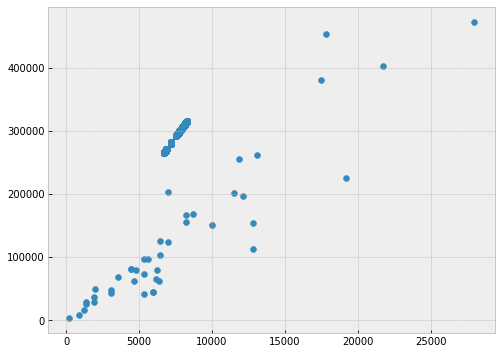

In [55]:
plt.scatter(x = telematics_sample_df['ENGINE_TOTAL_HOURS_OF_OPERATION'].values, 
            y = telematics_sample_df['ENGINE_TOTAL_FUEL_USED'].values)
plt.show()

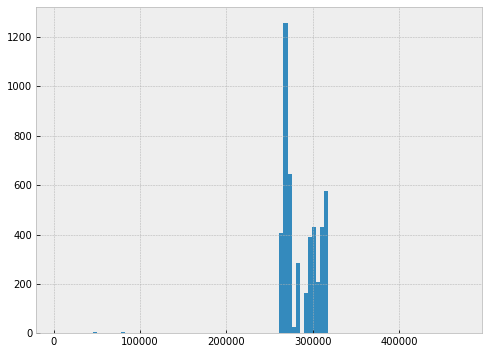

In [56]:
telematics_sample_df['ENGINE_TOTAL_FUEL_USED'].hist(bins = 100)
plt.show()

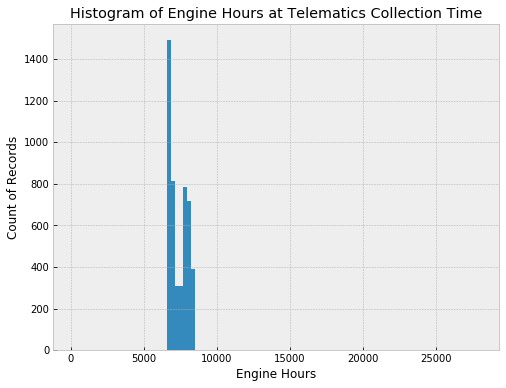

In [57]:
telematics_sample_df['ENGINE_TOTAL_HOURS_OF_OPERATION'].hist(bins = 100)
plt.title('Histogram of Engine Hours at Telematics Collection Time')
plt.xlabel('Engine Hours')
plt.ylabel('Count of Records')
plt.show()

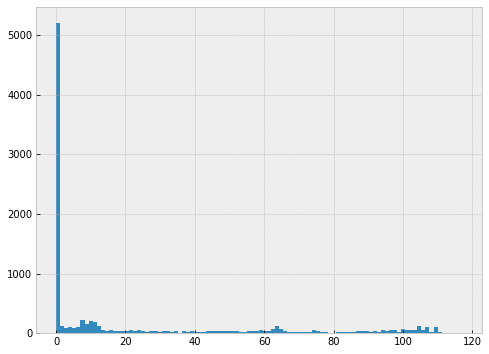

In [59]:
telematics_sample_df.GPS_VEHICLE_SPEED.hist(bins = 100)
plt.show()

In [61]:
telematics_sample_df_extract = telematics_sample_df.loc[(telematics_sample_df.LATITUDE > 19.5) & 
                         (telematics_sample_df.LATITUDE < 64.9) & 
                         (telematics_sample_df.LONGITUDE > -161.7) & 
                         (telematics_sample_df.LONGITUDE < -68.1) & 
                         (~telematics_sample_df.ENGINE_TOTAL_HOURS_OF_OPERATION.isnull()), :].\
    sort_values('ENGINE_TOTAL_HOURS_OF_OPERATION').copy()

In [65]:
telematics_sample_df_extract.shape

(4727, 18)

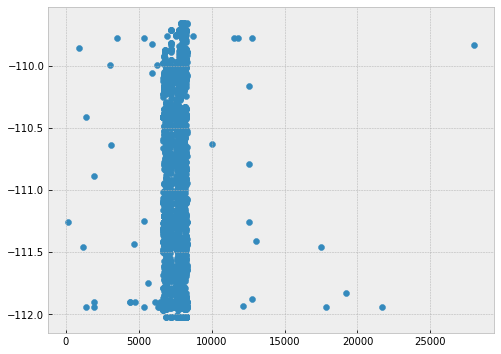

In [64]:
plt.scatter(x = telematics_sample_df_extract['ENGINE_TOTAL_HOURS_OF_OPERATION'].values, 
            y = telematics_sample_df_extract['LONGITUDE'].values)
plt.show()

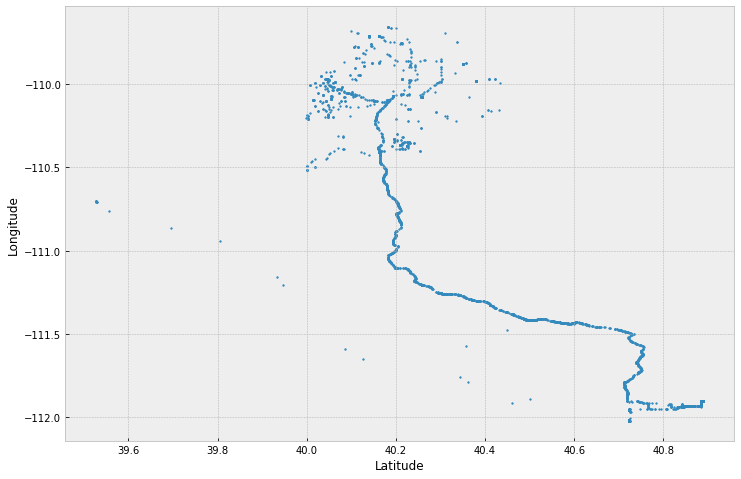

In [66]:
plt.figure(figsize=(12,8))
plt.scatter(x = telematics_sample_df_extract['LATITUDE'].values, 
            y = telematics_sample_df_extract['LONGITUDE'].values, s = 3)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

# Plot on Google Map

In [67]:
import gmplot

In [32]:
gmap = gmplot.GoogleMapPlotter(40.4, -110.5, 9)
gmap.scatter(telematics_sample_df_extract.\
                loc[:, 'LATITUDE'].values, 
          telematics_sample_df_extract.\
                loc[:, 'LONGITUDE'].values, 
          size = 100, marker=False)

# gmap.scatter(telematics_sample_df_extract.\
#                 loc[telematics_sample_df_extract.ENGINE_TOTAL_HOURS_OF_OPERATION > 8000,
#                     'LATITUDE'].values, 
#           telematics_sample_df_extract.\
#                 loc[telematics_sample_df_extract.ENGINE_TOTAL_HOURS_OF_OPERATION > 8000, 
#                     'LONGITUDE'].values, 
#           size = 100, marker=False)
gmap.draw("Life_of_ESN_79763462.html")

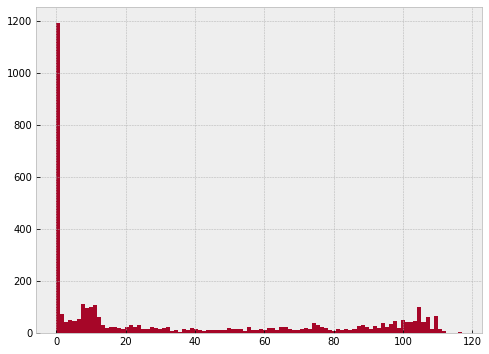

In [34]:
telematics_sample_df_extract.GPS_VEHICLE_SPEED.hist(bins = 100)
plt.show()

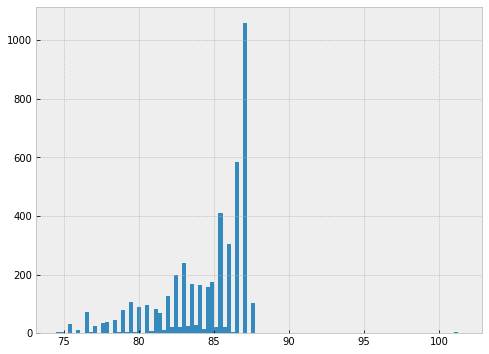

In [37]:
telematics_sample_df_extract.BAROMETRIC_PRESSURE.hist(bins = 100)
plt.show()

### Inpute Fault Code

In [68]:
telematics_sample_df_extract.FAULT_CODE.fillna('', inplace = True)

In [69]:
telematics_sample_df_extract.shape

(4727, 18)

In [70]:
telematics_sample_df_extract.FAULT_CODE.value_counts()

        4695
1885      10
3446      10
3568       4
3712       3
6254       2
3567       2
241        1
Name: FAULT_CODE, dtype: int64

In [47]:
telematics_sample_df_extract.FAULT_CODE_DESCRIPTION.value_counts()

                                                                                                                           612
Aftertreatment Intake Gas Sensor Heater - Current Below Normal or Open Circuit                                              10
Aftertreatment 1 Intake NOx Sensor Circuit - Voltage Below Normal or Shorted to Low Source                                  10
Aftertreatment 1 Diesel Exhaust Fluid Dosing Valve 1 - Mechanical System Not Responding or Out of Adjustment                 4
Aftertreatment SCR Operator Inducement - Data Valid But Above Normal Operating Range - Most Severe Level                     3
Aftertreatment 1 Diesel Exhaust Fluid Dosing Valve 1 Circuit - Current Below Normal or Open Circuit                          2
Aftertreatment SCR Operator Inducement Severity - Data Valid But Above Normal Operating Range - Moderately Severe Level      2
Wheel-Based Vehicle Speed - Data Erratic, Intermittent, or Incorrect                                           

In [79]:
gmap = gmplot.GoogleMapPlotter(40.4, -110.5, 9)
gmap.scatter(telematics_sample_df_extract.\
                loc[telematics_sample_df_extract.GPS_VEHICLE_SPEED > 40, 'LATITUDE'].values, 
          telematics_sample_df_extract.\
                loc[telematics_sample_df_extract.GPS_VEHICLE_SPEED > 40, 'LONGITUDE'].values, 
          size = 100, marker=False, c = 'blue')
gmap.scatter(telematics_sample_df_extract.\
                loc[telematics_sample_df_extract.GPS_VEHICLE_SPEED <= 40, 'LATITUDE'].values, 
          telematics_sample_df_extract.\
                loc[telematics_sample_df_extract.GPS_VEHICLE_SPEED <= 40, 'LONGITUDE'].values, 
          size = 100, marker=False, c = 'green')
gmap.scatter(telematics_sample_df_extract.\
                loc[telematics_sample_df_extract.FAULT_CODE.apply(len) > 0, 'LATITUDE'].values, 
          telematics_sample_df_extract.\
                loc[telematics_sample_df_extract.FAULT_CODE.apply(len) > 0, 'LONGITUDE'].values, 
          size = 500, marker=False, c = 'black')

gmap.scatter(telematics_sample_df_extract.\
                loc[telematics_sample_df_extract['OCCURRENCE_DATE'] == '2017-03-14', 'LATITUDE'].values, 
          telematics_sample_df_extract.\
                loc[telematics_sample_df_extract['OCCURRENCE_DATE'] == '2017-03-14', 'LONGITUDE'].values, 
          size = 10, marker=True, c = 'pink')
gmap.scatter(telematics_sample_df_extract.\
                loc[telematics_sample_df_extract['OCCURRENCE_DATE'] == '2017-03-16', 'LATITUDE'].values, 
          telematics_sample_df_extract.\
                loc[telematics_sample_df_extract['OCCURRENCE_DATE'] == '2017-03-16', 'LONGITUDE'].values, 
          size = 10, marker=True, c = 'salmon')
gmap.scatter(telematics_sample_df_extract.\
                loc[telematics_sample_df_extract['OCCURRENCE_DATE'] == '2017-04-14', 'LATITUDE'].values, 
          telematics_sample_df_extract.\
                loc[telematics_sample_df_extract['OCCURRENCE_DATE'] == '2017-04-14', 'LONGITUDE'].values, 
          size = 10, marker=True, c = 'goldenrod')
gmap.scatter(telematics_sample_df_extract.\
                loc[telematics_sample_df_extract['OCCURRENCE_DATE'] == '2017-07-28', 'LATITUDE'].values, 
          telematics_sample_df_extract.\
                loc[telematics_sample_df_extract['OCCURRENCE_DATE'] == '2017-07-28', 'LONGITUDE'].values, 
          size = 10, marker=True, c = 'red')
# gmap.scatter(telematics_sample_df_extract.\
#                 loc[telematics_sample_df_extract.ENGINE_TOTAL_HOURS_OF_OPERATION > 8000,
#                     'LATITUDE'].values, 
#           telematics_sample_df_extract.\
#                 loc[telematics_sample_df_extract.ENGINE_TOTAL_HOURS_OF_OPERATION > 8000, 
#                     'LONGITUDE'].values, 
#           size = 100, marker=False)
gmap.draw("Life_of_ESN_79763462_w_incident.html")

In [74]:
telematics_sample_df_extract.\
                loc[telematics_sample_df_extract['Issue Number'] != 'no_records', 'OCCURRENCE_DATE'].unique()

array(['2017-03-14', '2017-03-16', '2017-04-14', '2017-07-28'], dtype=object)